# Facial Expression Recognition

In this project, the objective is to train a model to recognize expressions from the faces in an image. The expressions can be one of the following- Angry, Disgust, Fear, Happy, Sad, Surprise and Neutral.

## Data Exploration

* The data consists of 48x48 pixel grayscale images of faces.
* The faces have been automatically registered so that the face is more or less centered and occupies about the same amount of space in each image.
* The file fer2013.csv contains three columns, "emotion", "pixels" and “Usage”.
* The "emotion" column contains a numeric code ranging from 0 to 6 (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral), inclusive, for the emotion that is present in the image.
* The "pixels" column contains a string surrounded in quotes for each image.
* The contents of this string is a space-separated pixel values in row major order.
* The “Usage” column contains one of the following-“Training “, “PublicTest “, “PrivateTest”. It depicts whether the data belongs to training, public or private test set.
* The training set, public test set and private test set consists of 28,709, 3,589 and 3,589 examples respectively.


In [213]:
import pandas as pd
import numpy as np

# Loading the dataset 
dataset=pd.read_csv("input/fer2013.csv")
print(dataset.head(n=3))

   emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training


#### Visualize the count of features of each labels

0    4953
1     547
2    5121
3    8989
4    6077
5    4002
6    6198
Name: emotion, dtype: int64


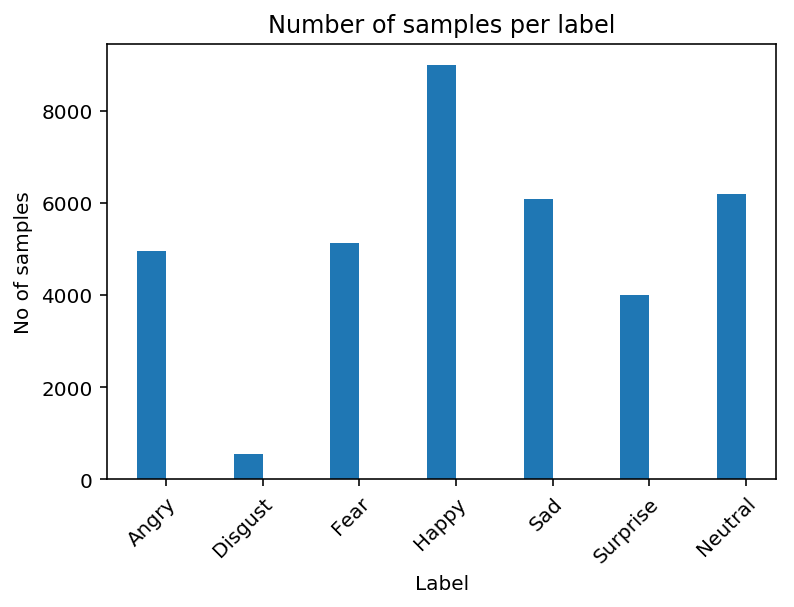

In [214]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

features_to_str=['Angry','Disgust','Fear','Happy','Sad','Surprise','Neutral']

print(dataset['emotion'].value_counts(sort=False))

ax = plt.subplot()
width=0.3
bins = map(lambda x: x-width/2,range(1,8))
ax.bar(bins,dataset['emotion'].value_counts(sort=False).tolist(),width=width)
ax.set_xticklabels(['']+features_to_str,rotation=45, rotation_mode="anchor", ha="right")
plt.xlabel('Label')
plt.ylabel('No of samples')
plt.title('Number of samples per label')
plt.show()

In [215]:
#function to get Train/Test/Validate dataset
def get_dataset(data,data_id):
    #Get data with the particular data_id
    data=data[data['Usage']==data_id]
    # Save the labels in a dataframe
    labels=data['emotion']
    # Drop the labels and Usage from the dataset
    data=data.drop(['Usage','emotion'],axis=1)
    # Save the dataset with just features
    data.to_csv("{}_features.csv".format(data_id),header=None,index=False)
    # load the features
    features=pd.read_csv("{}_features.csv".format(data_id),index_col=None,delim_whitespace=True,header=None)
    return features,labels

In [216]:
# Get the training data
X_train,Y_train=get_dataset(dataset,"Training")
print("Number of rows: {}".format(Y_train.shape[0]))
print(Y_train.value_counts())
print(X_train.head(n=3))

Number of rows: 28709
3    7215
6    4965
4    4830
2    4097
0    3995
5    3171
1     436
Name: emotion, dtype: int64
   0     1     2     3     4     5     6     7     8     9     ...   2294  \
0    70    80    82    72    58    58    60    63    54    58  ...    159   
1   151   150   147   155   148   133   111   140   170   174  ...    105   
2   231   212   156   164   174   138   161   173   182   200  ...    104   

   2295  2296  2297  2298  2299  2300  2301  2302  2303  
0   182   183   136   106   116    95   106   109    82  
1   108    95   108   102    67   171   193   183   184  
2   138   152   122   114   101    97    88   110   152  

[3 rows x 2304 columns]


In [217]:
# Get the validation data
X_validate,Y_validate=get_dataset(dataset,"PublicTest")
print("Number of rows: {}".format(Y_validate.shape[0]))
print(Y_validate.value_counts())
print(X_validate.head(n=3))

Number of rows: 3589
3    895
4    653
6    607
2    496
0    467
5    415
1     56
Name: emotion, dtype: int64
   0     1     2     3     4     5     6     7     8     9     ...   2294  \
0   254   254   254   254   254   249   255   160     2    58  ...     90   
1   156   184   198   202   204   207   210   212   213   214  ...    201   
2    69   118    61    60    96   121   103    87   103    88  ...     93   

   2295  2296  2297  2298  2299  2300  2301  2302  2303  
0    92    99    84    22     0     0    42   129   180  
1   199   197   193   188   184   180   172   167   161  
2    93    92    90    92    93    92    88    87    90  

[3 rows x 2304 columns]


In [218]:
# Get the testing data
X_test,Y_test=get_dataset(dataset,"PrivateTest")
print("Number of rows: {}".format(Y_validate.shape[0]))

Number of rows: 3589


In [219]:
image_width,image_height=48,48
# Reshape the images in 2 dimensions and normalize the values in range of (0-1) from (0-255)
def reshape_and_normalize(data):
    # Set data type as float
    data=data.values.astype("float64")
    data_size=data.shape[0]
    # Reshape the images in a 2D matrix
    data=data.reshape(data_size,image_width,image_height,1)
    #normalize the images from (0,255) to (0,1)
    data=data/255.00
    return data


In [220]:
# reshape images in 2 dimensions and normalize them
X_train=reshape_and_normalize(X_train)
X_validate=reshape_and_normalize(X_validate)
X_test=reshape_and_normalize(X_test)
print("Shape of X_train: {}".format(X_train.shape))
print("Shape of X_test: {}".format(X_validate.shape))

Shape of X_train: (28709, 48, 48, 1)
Shape of X_test: (3589, 48, 48, 1)


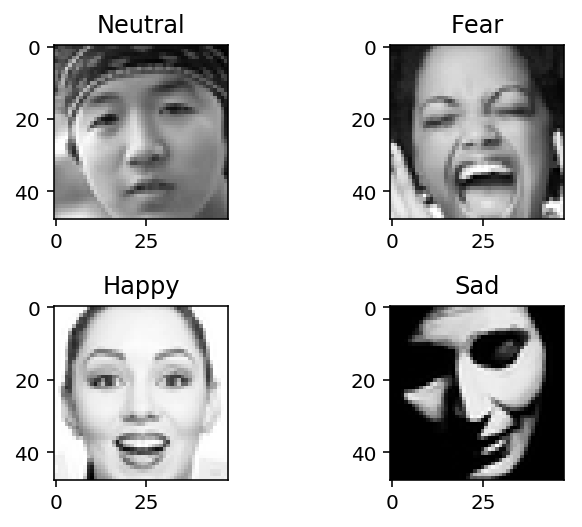

In [221]:
# Show some sample images from training dataset
fig=plt.figure()
def show_image(dataX,dataY,position,i):
    sub_plt=fig.add_subplot(2,2,i)
    plt.subplots_adjust(hspace = 0.5,wspace=0.01)
    plt.imshow(dataX[position,:,:,0],cmap='gray')
    sub_plt.set_title(features_to_str[dataY[position]])
    
show_image(X_train,Y_train,11,1)
show_image(X_train,Y_train,351,2)
show_image(X_train,Y_train,4371,3)
show_image(X_train,Y_train,12121,4)

### Benchmark

In [222]:
# show accuracy score of a random classifier
import numpy as np
from sklearn.metrics import accuracy_score
Y_random_predicted=np.random.randint(low=0,high=7,size=Y_test.shape[0])
accuracy=accuracy_score(Y_test,Y_random_predicted)
print("Random classifier has accuracy score of {}".format(accuracy))

Random classifier has accuracy score of 0.142379492895


## Preprocessing the Data

### Split into train/validate/test dataset:
* The dataset has been already split into train/validate/test dataset. There are 80%, 10% and 10% of images in training, validation and testing dataset respectively.

### Normalization: 
* The images have already been normalized to the range (0,1) from the range (0,255) in the above function reshape_and_normalize().

### Adding more data to training dataset by image transformations:
* The images are flipped horizontally, rotated left and right by random values in range 10 and 30 degrees and blurred a little.

In [223]:
# Helper fuctions to create transformations of images
from scipy import ndimage

def rotate_image_left(features):
    result = np.zeros(shape=features.shape)
    for i in range(features.shape[0]):
        result[i,:,:,0]=ndimage.rotate(features[i,:,:,0],np.random.randint(low=-31,high=10,size=1),reshape=False)
    print("Rotation Left Done: {}".format(result.shape))
    return result

def rotate_image_right(features):
    result = np.zeros(shape=features.shape)
    for i in range(features.shape[0]):
        result[i,:,:,0]=ndimage.rotate(features[i,:,:,0],np.random.randint(low=10,high=31,size=1),reshape=False)
    print("Rotation Right Done: {}".format(result.shape))
    return result

def blur_image(features):
    result = np.zeros(shape=features.shape)
    for i in range(features.shape[0]):
        result[i,:,:,0]=ndimage.gaussian_filter(features[i,:,:,0],sigma=1)
    print("Blur Done: {}".format(result.shape))
    return result

def flip_image_horizontally(features):
    result = np.zeros(shape=features.shape)
    for i in range(features.shape[0]):
        result[i,:,:,0]=np.fliplr(features[i,:,:,0])
    print("Flip horizontally Done: {}".format(result.shape))
    return result

def transform_values(features,labels):
    data=zip(features,labels)
    data_rl=zip(rotate_image_left(features),labels)
    data_rr=zip(rotate_image_right(features),labels)
    data_b=zip(blur_image(features),labels)
    data_f=zip(flip_image_horizontally(features),labels)
    return np.concatenate((data, data_rl,data_rr,data_b,data_f), axis=0)


data_transformed=transform_values(X_train,Y_train)
print("Transformation Done")

Rotation Left Done: (28709, 48, 48, 1)
Rotation Right Done: (28709, 48, 48, 1)
Blur Done: (28709, 48, 48, 1)
Flip horizontally Done: (28709, 48, 48, 1)
Transformation Done


features: (143545, 48, 48, 1) , labels: (143545,)


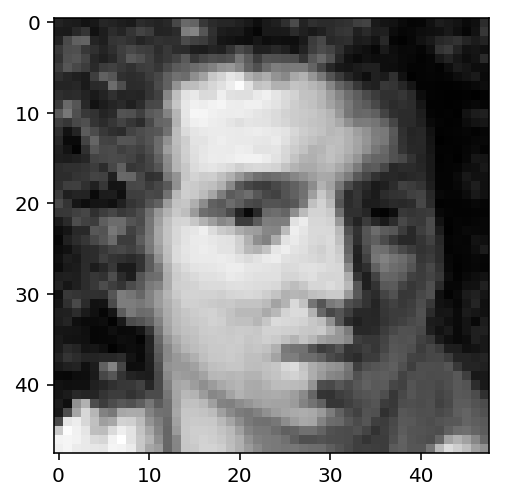

In [224]:
# extrach features and labels from transformed data and show a sample feature
fig=plt.figure()
transformed_features,transformed_labels=zip(*data_transformed)
np_features=np.asarray(transformed_features)
np_labels=np.asanyarray(transformed_labels)
print("features: {} , labels: {}".format(np_features.shape,np_labels.shape))
plt.imshow(np_features[1000,:,:,0],cmap='gray')

### Randomization:
* The training data is randomly shuffled.

In [225]:
#randomly shuffle the dataset
from sklearn.utils import shuffle
X_train,Y_train = shuffle(np_features, np_labels, random_state=10)

### One-Hot Encoding:

In [226]:
#one hot encode the labels
from sklearn import preprocessing
labels_map=range(7)
# function to one-hot encode labels
def one_hot_encode(labels):
    label_binarizer=preprocessing.LabelBinarizer()
    label_binarizer.fit(labels_map)
    return label_binarizer.transform(labels)

Y_test_raw=Y_test
Y_train=one_hot_encode(Y_train)
Y_test=one_hot_encode(Y_test)
Y_validate=one_hot_encode(Y_validate)
print(Y_train[0:3])

[[0 0 0 0 1 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0]]


### Batches:

In [227]:
# Function that returns the batches specified by batch_size
def split_into_batches(feature,label,batch_size):
    no_of_batches=int(feature.shape[0]/batch_size)
    if feature.shape[0]%batch_size!=0:
        no_of_batches+=1
    return np.array_split(feature,no_of_batches),np.array_split(label,no_of_batches)

size_of_one_batch=10000
X_train_batch,Y_train_batch=split_into_batches(X_train,Y_train,size_of_one_batch)
print("Number of Training batches: {}".format(len(X_train_batch)))

Number of Training batches: 15


## Implementation

In [228]:
# BOILER PLATE CODE- HELPER FUNCTIONS
import tensorflow as tf

def nn_image_input(image_shape):
    return tf.placeholder("float",shape=(None,image_shape[0],image_shape[1],image_shape[2]),name="x")

def nn_label_input(n_classes):
    return tf.placeholder(tf.float32,shape=(None,n_classes),name="y")

def nn_keep_prob_input():
    return tf.placeholder(tf.float32,name="keep_prob")

def conv2d_maxpool_layer(weight_name,x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides):
    ptensor_shape=x_tensor.get_shape().as_list()
    weight=tf.get_variable(name=weight_name,shape=[conv_ksize[0],conv_ksize[1],x_tensor.get_shape().as_list()[3],conv_num_outputs],initializer=tf.truncated_normal_initializer(stddev=(2.0/(ptensor_shape[1]*ptensor_shape[2]*ptensor_shape[3]))**0.5))
    bias=tf.Variable(tf.zeros(conv_num_outputs))
    conv_layer=tf.nn.conv2d(x_tensor,weight,strides=[1,conv_strides[0],conv_strides[1],1],padding='SAME')
    conv_layer=tf.nn.bias_add(conv_layer,bias)
    conv_layer=tf.nn.relu(conv_layer)
    conv_layer=tf.nn.max_pool(conv_layer,ksize=[1,pool_ksize[0],pool_ksize[1],1],strides=[1,pool_strides[0],pool_strides[1],1],padding='SAME')
    return conv_layer

def flatten_layer(x_tensor):
    return tf.contrib.layers.flatten(x_tensor)

def fully_connected_layer(x_tensor, n_outputs):
    return tf.contrib.layers.fully_connected(x_tensor,num_outputs=n_outputs)

def output(x_tensor, n_outputs):
    return tf.contrib.layers.fully_connected(x_tensor,num_outputs=n_outputs,activation_fn=None)    

In [229]:
def convolutional_network(x, keep_prob):
    # four convolutional maxpool layer
    conv=conv2d_maxpool_layer("w1",x,conv_num_outputs=64,conv_ksize=(3,3),conv_strides=(1,1),pool_ksize=(2,2),pool_strides=(2,2))
    conv=conv2d_maxpool_layer("w2",x,conv_num_outputs=128,conv_ksize=(2,2),conv_strides=(1,1),pool_ksize=(2,2),pool_strides=(2,2))
    conv=conv2d_maxpool_layer("w3",conv,conv_num_outputs=256,conv_ksize=(2,2),conv_strides=(1,1),pool_ksize=(2,2),pool_strides=(2,2))
    conv=conv2d_maxpool_layer("w4",conv,conv_num_outputs=512,conv_ksize=(2,2),conv_strides=(1,1),pool_ksize=(2,2),pool_strides=(2,2))
    
    # one dropout
    flat_conv=tf.nn.dropout(conv,keep_prob=keep_prob)
    #one flatten layer
    flat_conv=flatten_layer(flat_conv)
    
    #four fully connected layer with three dropouts
    logit=tf.nn.dropout(flat_conv,keep_prob=keep_prob)
    logit=fully_connected_layer(logit,512)
    logit=fully_connected_layer(logit,256)
    logit=tf.nn.dropout(logit,keep_prob=keep_prob)
    logit=fully_connected_layer(logit,128)
    logit=fully_connected_layer(logit,64)
    logit=tf.nn.dropout(logit,keep_prob=keep_prob)
    
    #final output layer
    final_logit=output(logit,7)
    return final_logit

tf.reset_default_graph()

x = nn_image_input((48, 48, 1))
y = nn_label_input(7)
keep_prob = nn_keep_prob_input()

logits = convolutional_network(x, keep_prob)

logits = tf.identity(logits, name='logits')

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))    
optimizer = tf.train.AdamOptimizer().minimize(cost)

correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')
print("CNN created")

CNN created


In [230]:
def train_nn(sess,optimizer,keep_probability,feature_batch,label_batch):
    sess.run(optimizer,feed_dict={x:feature_batch,y:label_batch,keep_prob:keep_probability})

In [231]:
def print_loss_and_accuracy(sess,feature,label,cost,accuracy):
    loss=sess.run(cost,feed_dict={x:feature,y:label,keep_prob:1.0})
    accuracy=sess.run(accuracy,feed_dict={x:X_validate,y:Y_validate,keep_prob:1.0})
    print("Loss: {} , Validation accuracy: {}".format(loss,accuracy))
    return loss,accuracy

In [232]:
#utility functions for displaying loss and training graph
def display_stats(epoch_list,loss_list,accuracy_list):
    epoch_list=np.array(epoch_list)
    loss_list=np.array(loss_list)
    accuracy_list=np.array(accuracy_list)
    plt.figure(1)
    plt.subplots_adjust(hspace = 0.5)
    plt.subplot(211)
    plt.plot(epoch_list, loss_list, 'r-')
    plt.title("Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Training Loss")
    
    plt.subplot(212)
    plt.plot(epoch_list, accuracy_list, 'b-')
    plt.title("Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Validation Accuracy")
    
    plt.show()    

## Training

#### HYPERPARAMETERS:

In [233]:
# HYPERPARAMETERS:
epochs=10
keep_probability=0.9
batch_size=256

#### Training on a single batch:

Epoch 1 on Batch 1:  
Loss: 1.79902982712 , Validation accuracy: 0.249373108149
Epoch 2 on Batch 1:  
Loss: 1.81095051765 , Validation accuracy: 0.249373108149
Epoch 3 on Batch 1:  
Loss: 1.78903532028 , Validation accuracy: 0.24853721261
Epoch 4 on Batch 1:  
Loss: 1.7674523592 , Validation accuracy: 0.26023966074
Epoch 5 on Batch 1:  
Loss: 1.73911929131 , Validation accuracy: 0.286709427834
Epoch 6 on Batch 1:  
Loss: 1.6937584877 , Validation accuracy: 0.314572274685
Epoch 7 on Batch 1:  
Loss: 1.6802072525 , Validation accuracy: 0.338255792856
Epoch 8 on Batch 1:  
Loss: 1.66602385044 , Validation accuracy: 0.347729206085
Epoch 9 on Batch 1:  
Loss: 1.6363670826 , Validation accuracy: 0.346614718437
Epoch 10 on Batch 1:  
Loss: 1.59055113792 , Validation accuracy: 0.380050182343


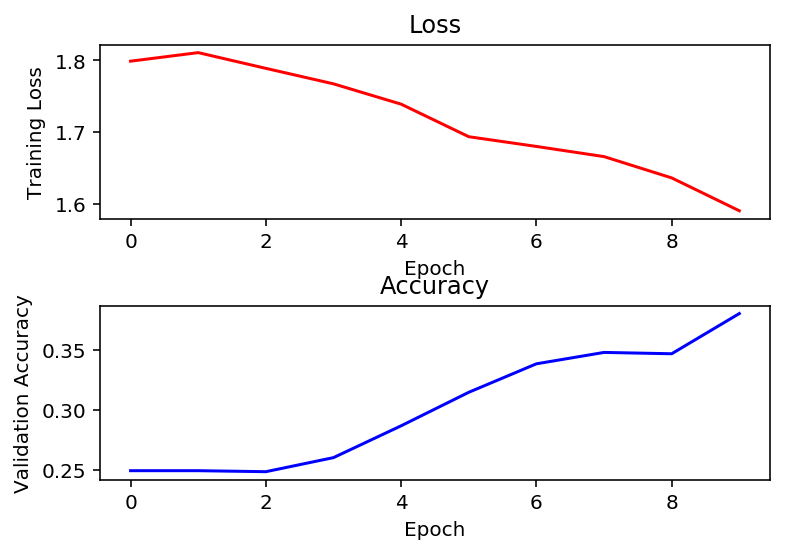

In [115]:
#Training on a single batch:

epoch_list,loss_list,acc_list=[],[],[]

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(epochs):
        for xx in range(1):
            tx,ty=split_into_batches(X_train_batch[xx],Y_train_batch[xx],batch_size)
            for i in range(len(tx)):
                train_nn(sess,optimizer,keep_probability,tx[i],ty[i])
            print('Epoch {} on Batch {}:  '.format(epoch + 1, xx+1))
            loss_val,acc_val=print_loss_and_accuracy(sess,tx[i],ty[i], cost, accuracy)
            epoch_list.append(epoch)
            loss_list.append(loss_val)
            acc_list.append(acc_val)
display_stats(epoch_list,loss_list,acc_list)

#### Training on the complete dataset:

Training Started
Epoch 1 on Batch 1:  
Loss: 1.80519151688 , Validation accuracy: 0.249373108149
Epoch 1 on Batch 2:  
Loss: 1.77884209156 , Validation accuracy: 0.249373108149
Epoch 1 on Batch 3:  
Loss: 1.79898881912 , Validation accuracy: 0.249373108149
Epoch 1 on Batch 4:  
Loss: 1.76519405842 , Validation accuracy: 0.249651730061
Epoch 1 on Batch 5:  
Loss: 1.74897968769 , Validation accuracy: 0.26804125309
Epoch 1 on Batch 6:  
Loss: 1.74226152897 , Validation accuracy: 0.302033990622
Epoch 1 on Batch 7:  
Loss: 1.68208754063 , Validation accuracy: 0.325996100903
Epoch 1 on Batch 8:  
Loss: 1.67111587524 , Validation accuracy: 0.343549758196
Epoch 1 on Batch 9:  
Loss: 1.66447532177 , Validation accuracy: 0.356645315886
Epoch 1 on Batch 10:  
Loss: 1.68786513805 , Validation accuracy: 0.377821147442
Epoch 1 on Batch 11:  
Loss: 1.6016048193 , Validation accuracy: 0.390359431505
Epoch 1 on Batch 12:  
Loss: 1.62534475327 , Validation accuracy: 0.396210640669
Epoch 1 on Batch 13:  

Epoch 8 on Batch 10:  
Loss: 0.756916999817 , Validation accuracy: 0.592644274235
Epoch 8 on Batch 11:  
Loss: 0.715270876884 , Validation accuracy: 0.583170771599
Epoch 8 on Batch 12:  
Loss: 0.595474660397 , Validation accuracy: 0.578434109688
Epoch 8 on Batch 13:  
Loss: 0.700271546841 , Validation accuracy: 0.568960666656
Epoch 8 on Batch 14:  
Loss: 0.675062775612 , Validation accuracy: 0.581220388412
Epoch 8 on Batch 15:  
Loss: 0.703274548054 , Validation accuracy: 0.583170771599
Epoch 9 on Batch 1:  
Loss: 0.630577743053 , Validation accuracy: 0.590136528015
Epoch 9 on Batch 2:  
Loss: 0.65600168705 , Validation accuracy: 0.577319562435
Epoch 9 on Batch 3:  
Loss: 0.643708050251 , Validation accuracy: 0.599609971046
Epoch 9 on Batch 4:  
Loss: 0.56180793047 , Validation accuracy: 0.581220448017
Epoch 9 on Batch 5:  
Loss: 0.63090389967 , Validation accuracy: 0.578155517578
Epoch 9 on Batch 6:  
Loss: 0.611147284508 , Validation accuracy: 0.581777691841
Epoch 9 on Batch 7:  
Los

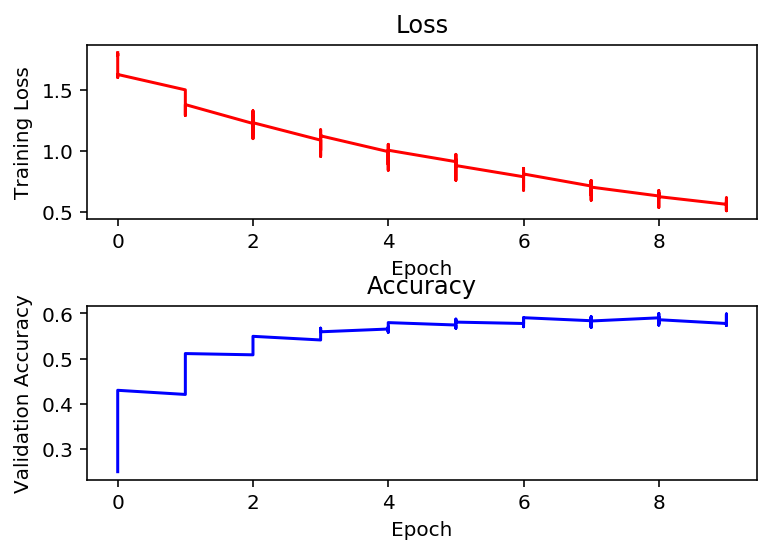

In [ ]:
save_model_path = './capstone_fer'

fepoch_list,floss_list,facc_list=[],[],[]

print('Training Started')

with tf.Session() as sess:

    sess.run(tf.global_variables_initializer())
    for epoch in range(epochs):
        for xx in range(len(X_train_batch)):
            tx,ty=split_into_batches(X_train_batch[xx],Y_train_batch[xx],batch_size)
            for i in range(len(tx)):
                train_nn(sess,optimizer,keep_probability,tx[i],ty[i])
            print('Epoch {} on Batch {}:  '.format(epoch + 1, xx+1))
            loss_val,acc_val=print_loss_and_accuracy(sess,tx[i],ty[i], cost, accuracy)
            fepoch_list.append(epoch)
            floss_list.append(loss_val)
            facc_list.append(acc_val)
            
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)
display_stats(fepoch_list,floss_list,facc_list)

## Result

#### Testing on test samples:

In [234]:
#helper function to visualize results
from sklearn import preprocessing
def display_image_predictions(features, labels, predictions):
    n_classes = 7
    label_names = ['Angry','Disgust','Fear','Happy','Sad','Surprise','Neutral']
    label_binarizer = preprocessing.LabelBinarizer()
    label_binarizer.fit(range(n_classes))
    label_ids = label_binarizer.inverse_transform(np.array(labels))

    fig, axies = plt.subplots(nrows=4, ncols=2)
    fig.tight_layout()
    fig.suptitle('Softmax Predictions', fontsize=20, y=1.1)

    n_predictions = 3
    margin = 0.05
    ind = np.arange(n_predictions)
    width = (1. - 2. * margin) / n_predictions

    for image_i, (feature, label_id, pred_indicies, pred_values) in enumerate(zip(features, label_ids, predictions.indices, predictions.values)):
        pred_names = [label_names[pred_i] for pred_i in pred_indicies]
        correct_name = label_names[label_id]
        axies[image_i][0].imshow(feature[:,:,0],cmap='gray')
        axies[image_i][0].set_title(correct_name)
        axies[image_i][0].set_axis_off()

        axies[image_i][1].barh(ind + margin, pred_values[::-1], width)
        axies[image_i][1].set_yticks(ind + margin)
        axies[image_i][1].set_yticklabels(pred_names[::-1])
        axies[image_i][1].set_xticks([0, 0.5, 1.0])


INFO:tensorflow:Restoring parameters from ./capstone_fer
Testing Accuracy: 0.593480050564



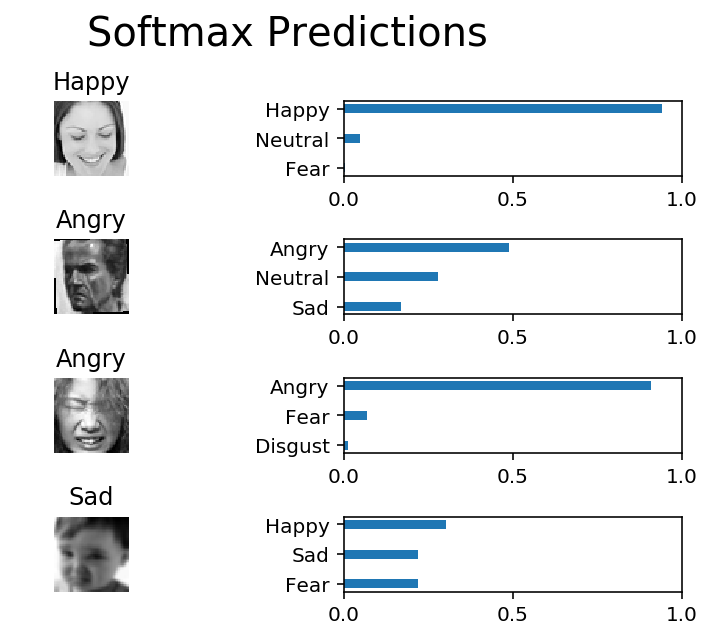

In [235]:
#test the model on test samples and find the predictions
import tensorflow as tf
import random

save_model_path = './capstone_fer'
n_samples = 4
top_n_predictions = 3
Y_predicted=None

def test_model():

    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:

        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        predictions=tf.argmax(loaded_logits,1)
        
        #calculate test accuracy
        test_acc_total = sess.run(loaded_acc,feed_dict={loaded_x: X_test, loaded_y: Y_test, loaded_keep_prob: 1.0})
        print('Testing Accuracy: {}\n'.format(test_acc_total))
        
        #get the predictions
        Y_pred=sess.run(predictions,feed_dict={loaded_x:X_test,loaded_keep_prob:1.0})
        
        #visualize random predictions
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(X_train,Y_train)), n_samples)))
        random_test_predictions = sess.run(tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, loaded_keep_prob: 1.0})
        display_image_predictions(random_test_features, random_test_labels, random_test_predictions)
        return Y_pred


Y_predicted=test_model()

Normalized confusion matrix
[[ 0.52  0.01  0.06  0.08  0.16  0.03  0.14]
 [ 0.27  0.44  0.07  0.05  0.11  0.04  0.02]
 [ 0.14  0.01  0.36  0.07  0.2   0.09  0.13]
 [ 0.04  0.    0.03  0.82  0.04  0.02  0.05]
 [ 0.11  0.01  0.1   0.11  0.46  0.02  0.19]
 [ 0.04  0.    0.12  0.07  0.02  0.71  0.04]
 [ 0.09  0.    0.04  0.09  0.17  0.02  0.58]]


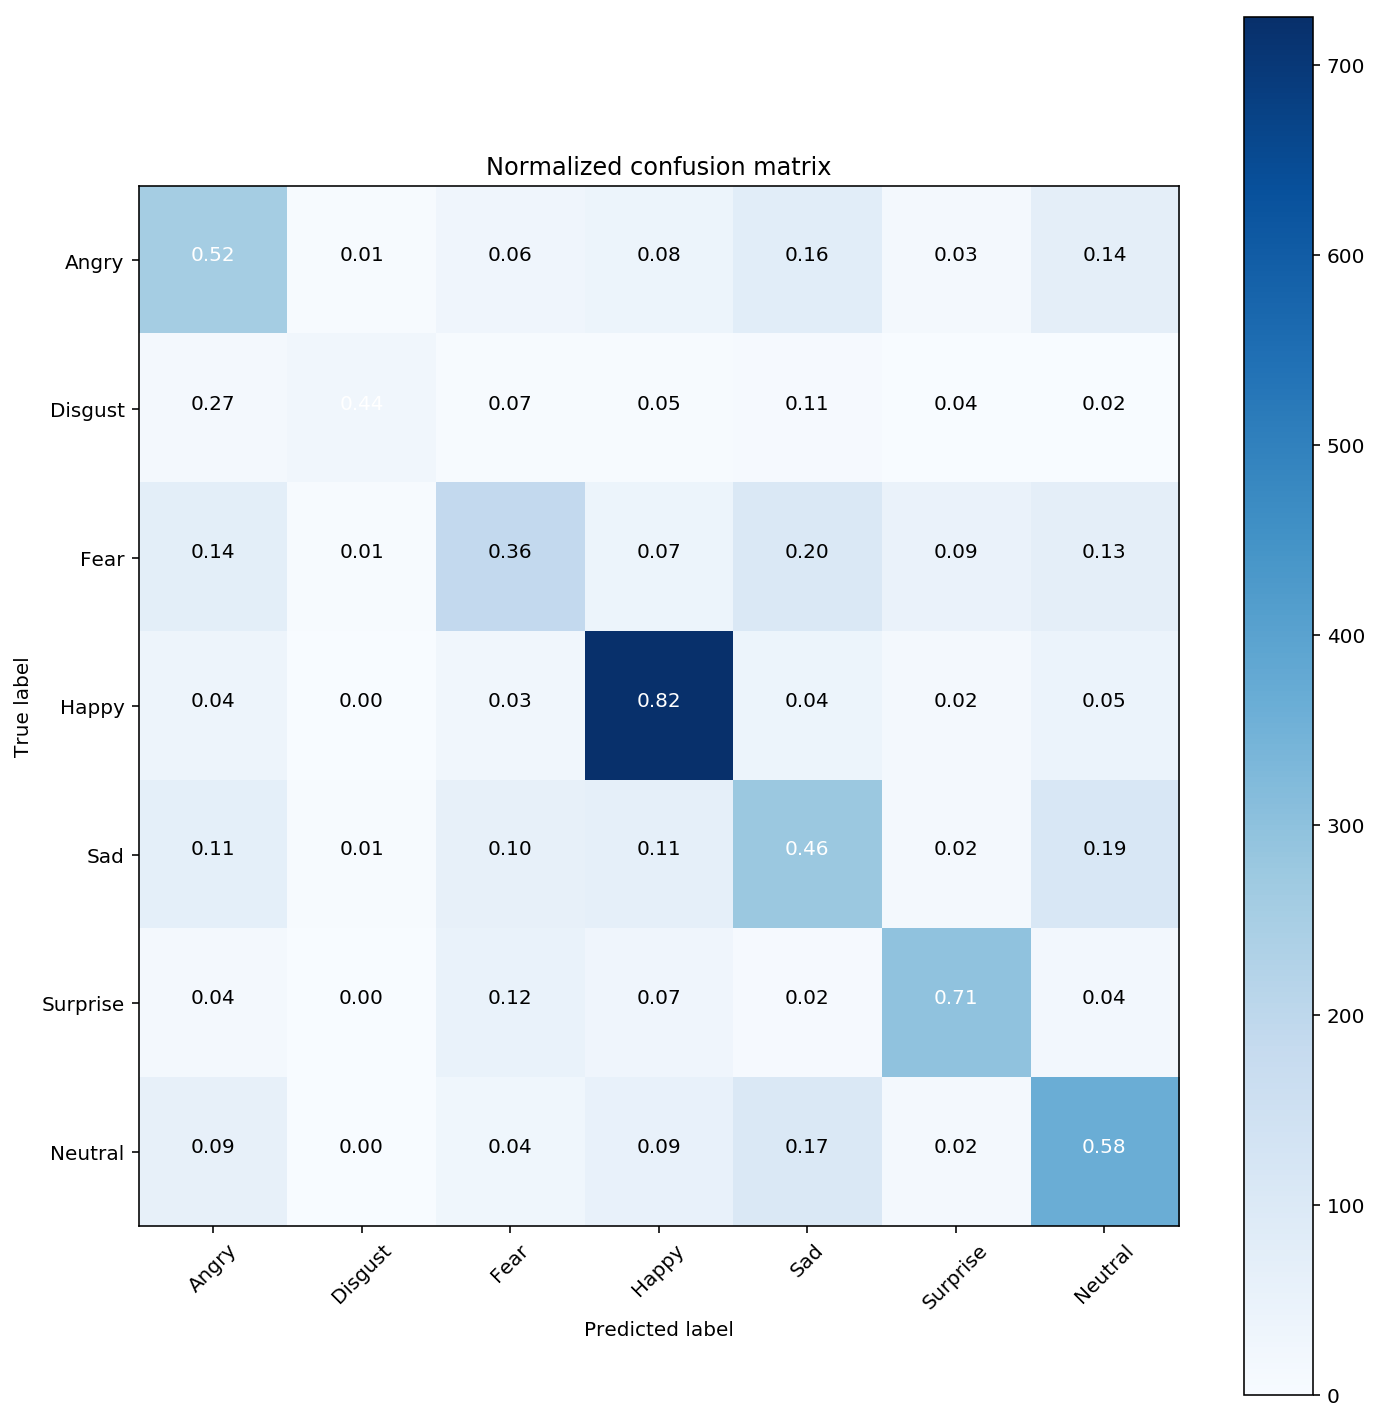

In [236]:
import itertools
from sklearn.metrics import confusion_matrix

#function to plot confusion matrix
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i,"{0:.2f}".format(cm[i, j]) ,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

label_names = ['Angry','Disgust','Fear','Happy','Sad','Surprise','Neutral']
#find confusion matrix
cnf_matrix = confusion_matrix(Y_test_raw, Y_predicted)
np.set_printoptions(precision=2)

#plot confusion matrix
plot_confusion_matrix(cnf_matrix, classes=label_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()